# Исследование рынка недвижимости

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка и водоема.

 Цель исследования 
 ------------------------------

    НАйти закономерности в ценообразовании квартир
    
> ## Ход исследования 
> Данные получены из файла `'/datasets/real_estate_data.csv'`
>> - Обзор данных
>> - Предобработка данных
>> - Расчеты и добавление результатов в таблицу
>> - Анализ недвидимости для региона
>> - Определение влияние факторов на стоимость квартир 
>> - Общий вывод


## Выгрузка библиотек и знакомство с данными.

In [1]:
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt


try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('C:/Users/Андрей/Andrey_Panasenko_Research_data_analysis_v01/real_estate_data.csv', sep='\t')

### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) <br>
- `balcony` — число балконов<br>
- `ceiling_height` — высота потолков (м)<br>
- `cityCenters_nearest` — расстояние до центра города (м)<br>
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
- `first_day_exposition` — дата публикации<br>
- `floor` — этаж<br>
- `floors_total` — всего этажей в доме<br>
- `is_apartment` — апартаменты (булев тип)<br>
- `kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
- `last_price` — цена на момент снятия с публикации<br>
- `living_area` — жилая площадь в квадратных метрах (м²)<br>
- `locality_name` — название населённого пункта<br>
- `open_plan` — свободная планировка (булев тип)<br>
- `parks_around3000` — число парков в радиусе 3 км<br>
- `parks_nearest` — расстояние до ближайшего парка (м)<br>
- `ponds_around3000` — число водоёмов в радиусе 3 км<br>
- `ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
- `rooms` — число комнатv
- `studio` — квартира-студия (булев тип)<br>
- `total_area` — общая площадь квартиры в квадратных метрах (м²)<br>
- `total_images` — число фотографий квартиры в объявлении<br>

In [2]:

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info() #Изучаем общую информацию о полученном датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

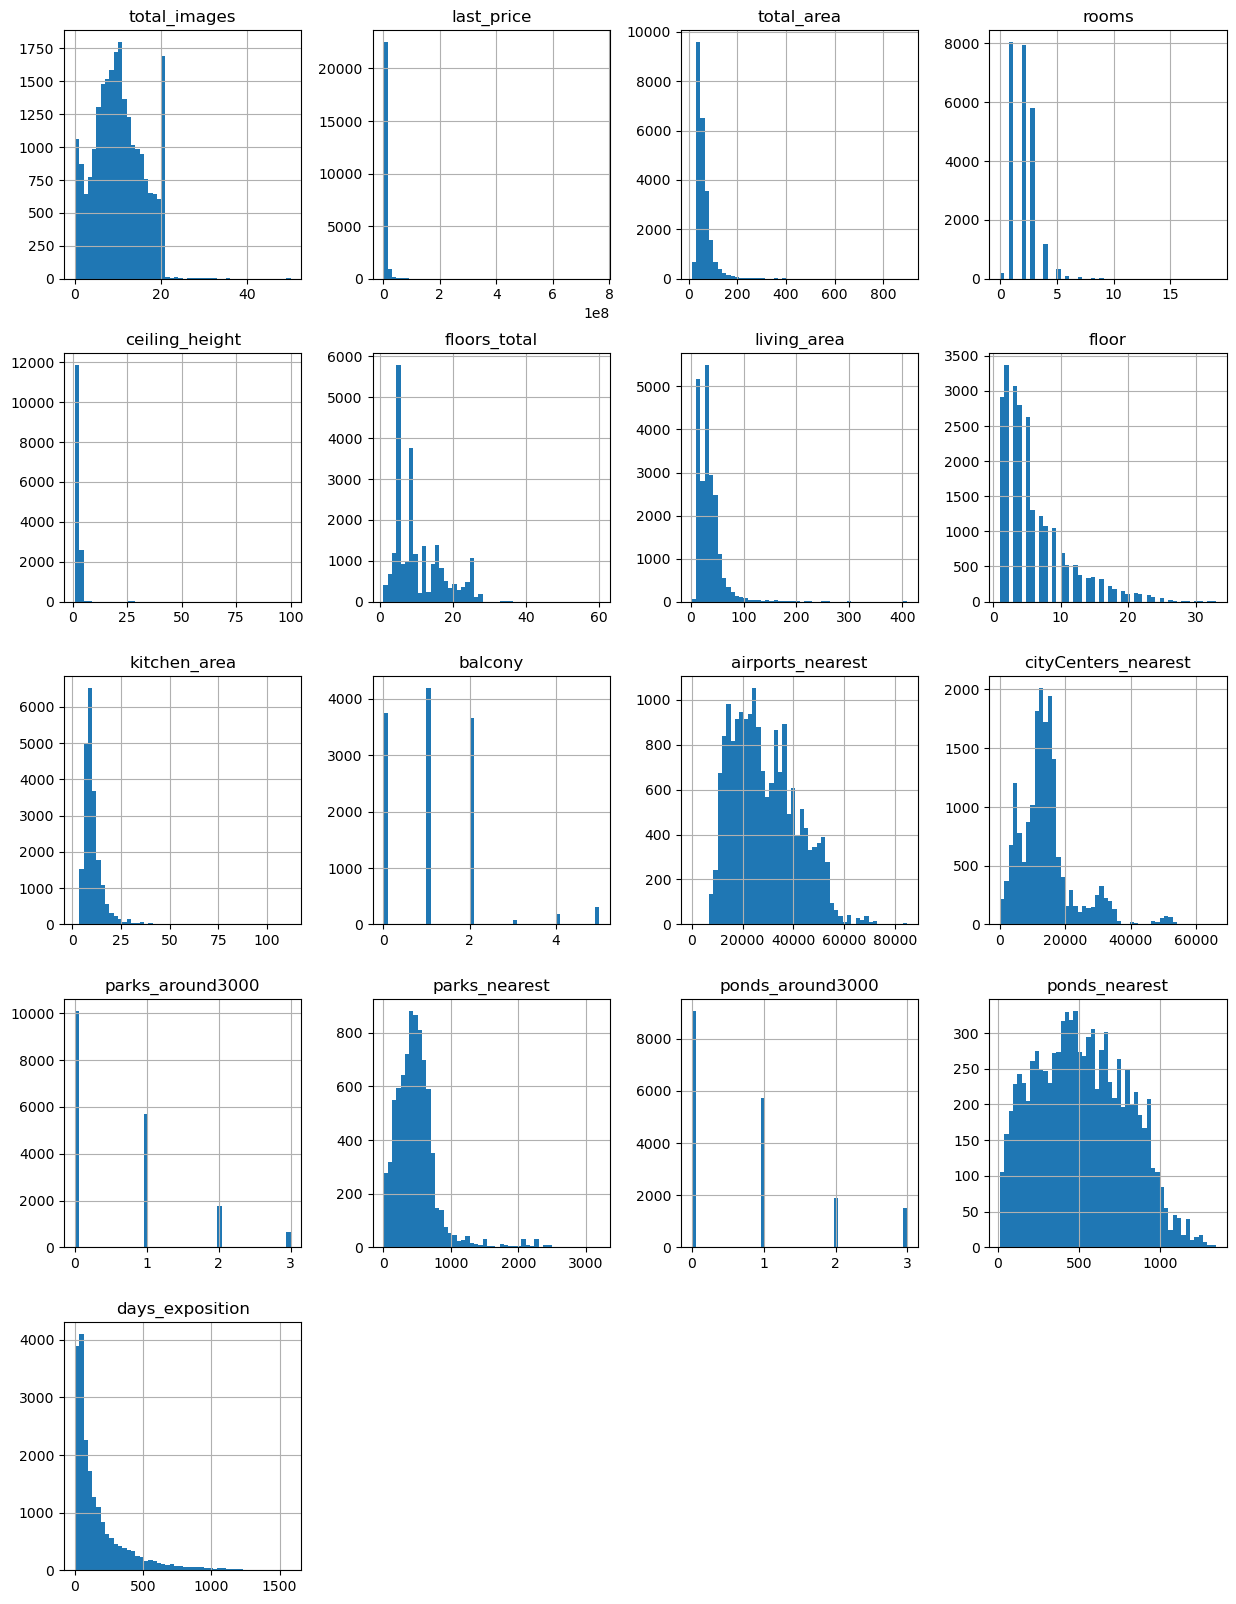

In [4]:
data.hist(bins=50,figsize=(15,20));

In [5]:
pd.options.display.float_format = '{:,.1f}'.format # отобразим резудьтат не в научном формате
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


<AxesSubplot:>

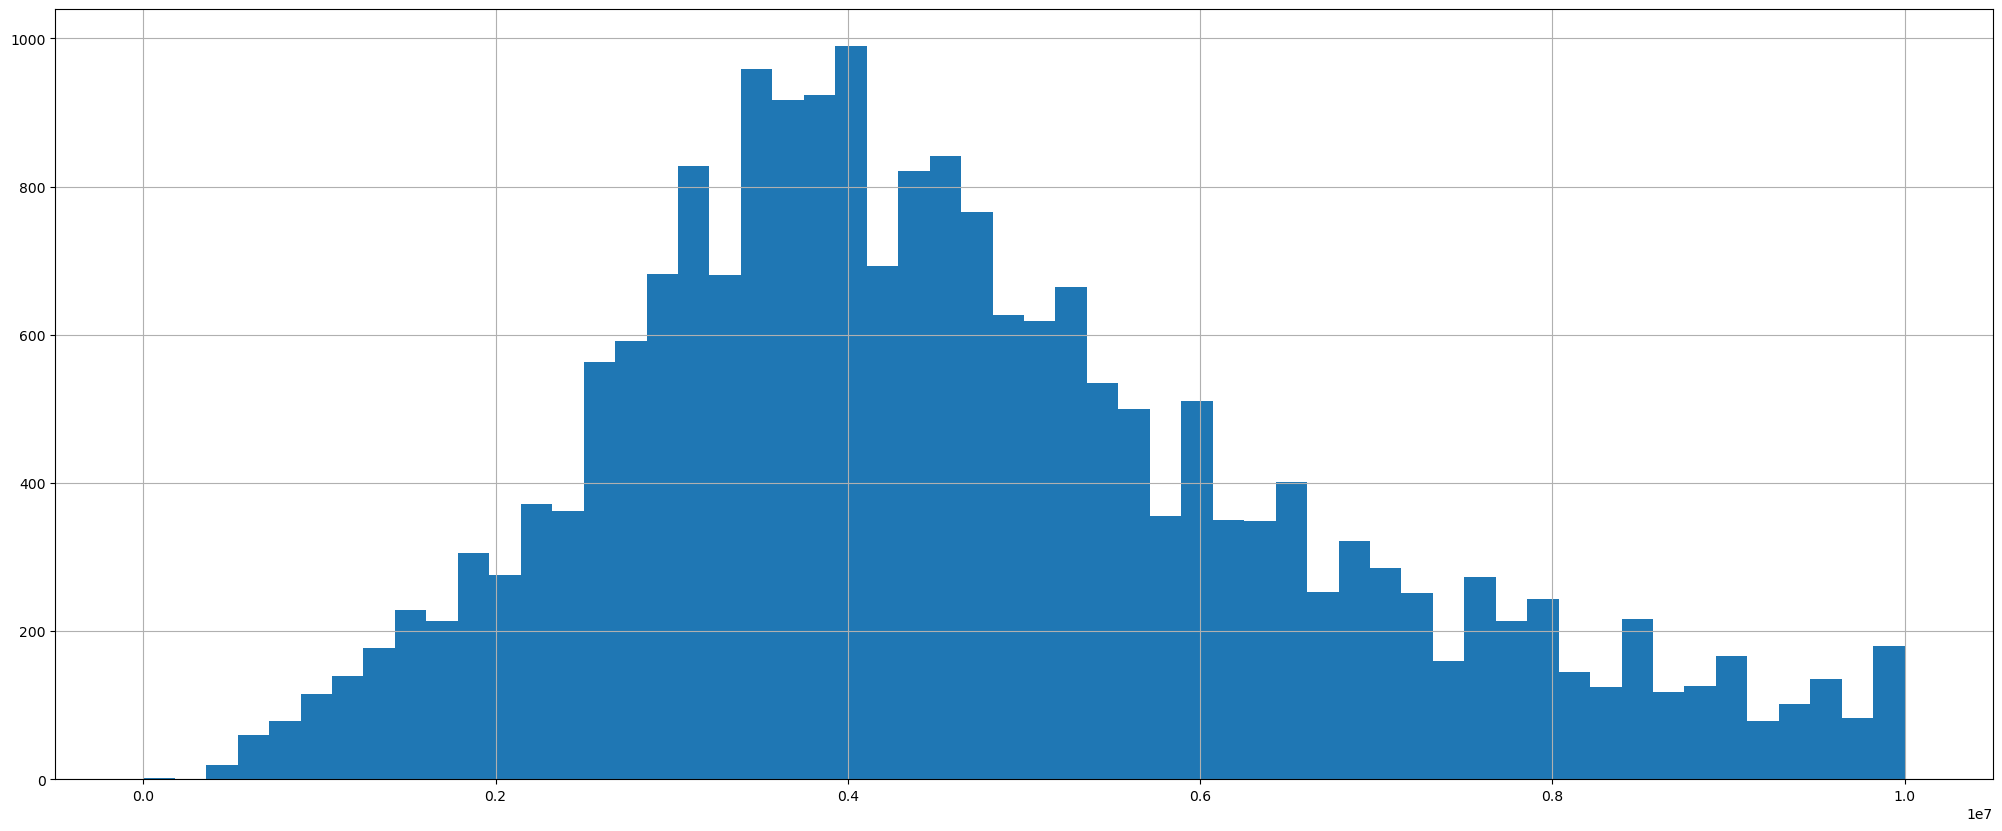

In [6]:
# некоторые графики требяют отдельной настройки для корректного отображения информации
data['last_price'].hist(bins='auto', figsize=(25,10), range=(0,10000000))

In [7]:

data['last_price'].describe()

count        23,699.0
mean      6,541,548.8
std      10,887,013.3
min          12,190.0
25%       3,400,000.0
50%       4,650,000.0
75%       6,800,000.0
max     763,000,000.0
Name: last_price, dtype: float64

<AxesSubplot:>

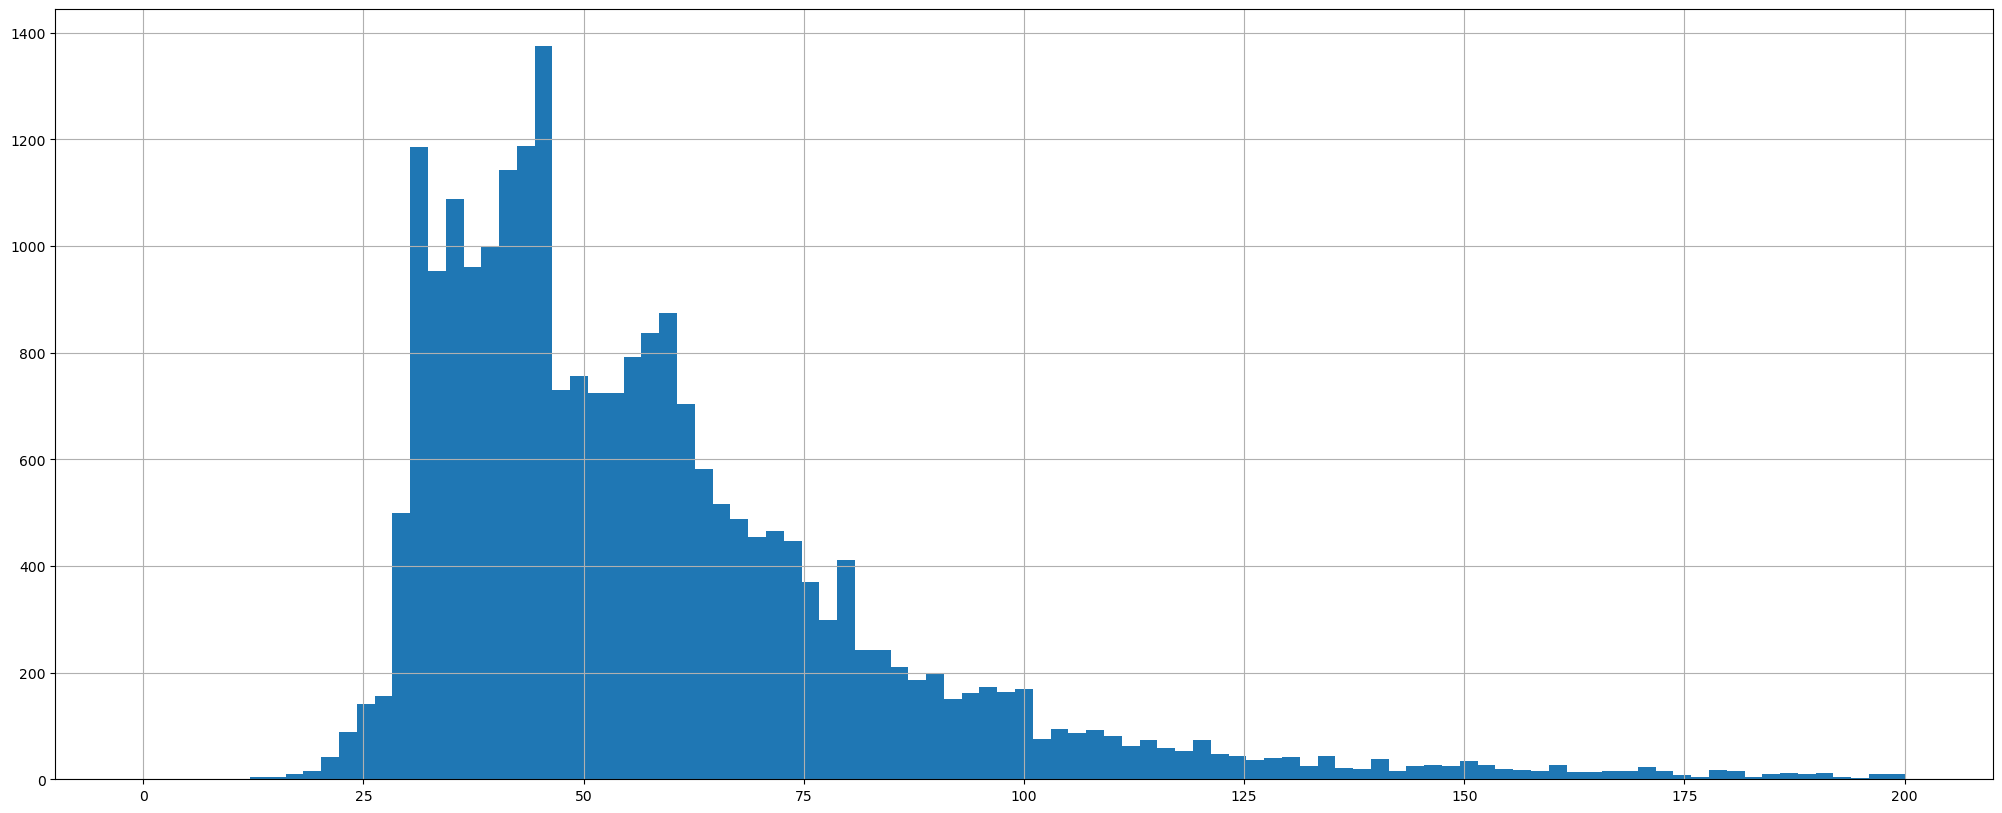

In [8]:
data['total_area'].hist(bins='auto', figsize=(25,10), range=(0,200))

In [9]:
data['total_area'].describe()

count   23,699.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.9
max        900.0
Name: total_area, dtype: float64

<AxesSubplot:>

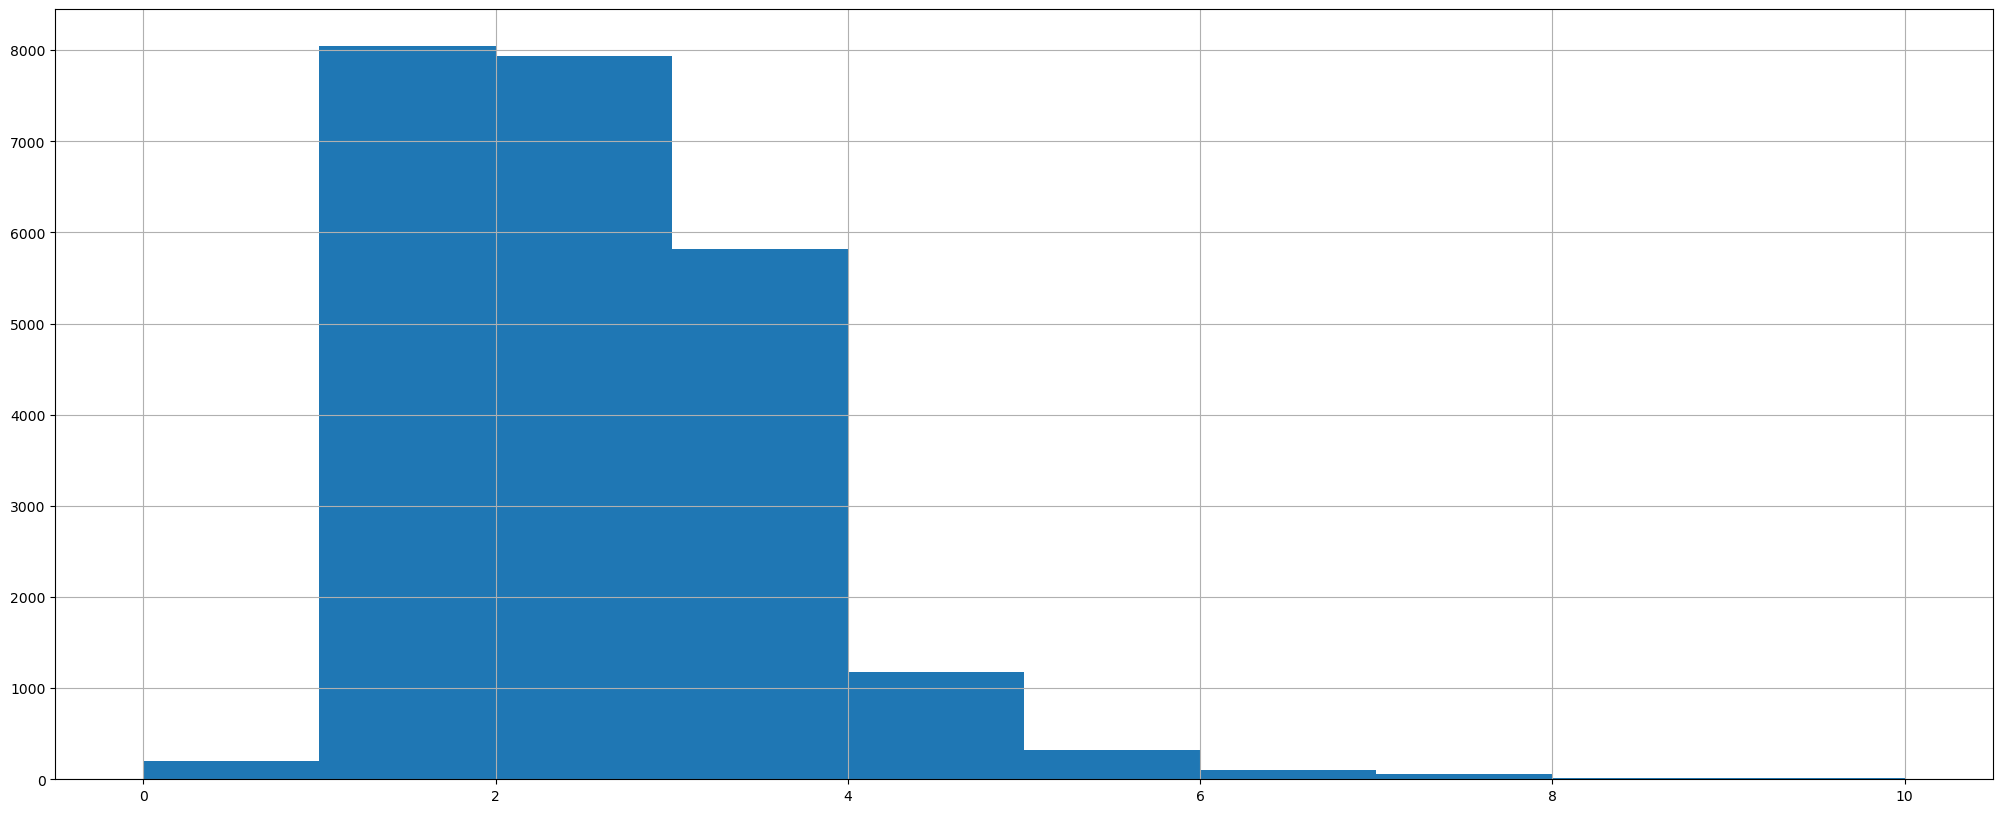

In [10]:
data['rooms'].hist(bins=10, figsize=(25,10), range=(0,10))

In [11]:
data['rooms'].describe()

count   23,699.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

<AxesSubplot:>

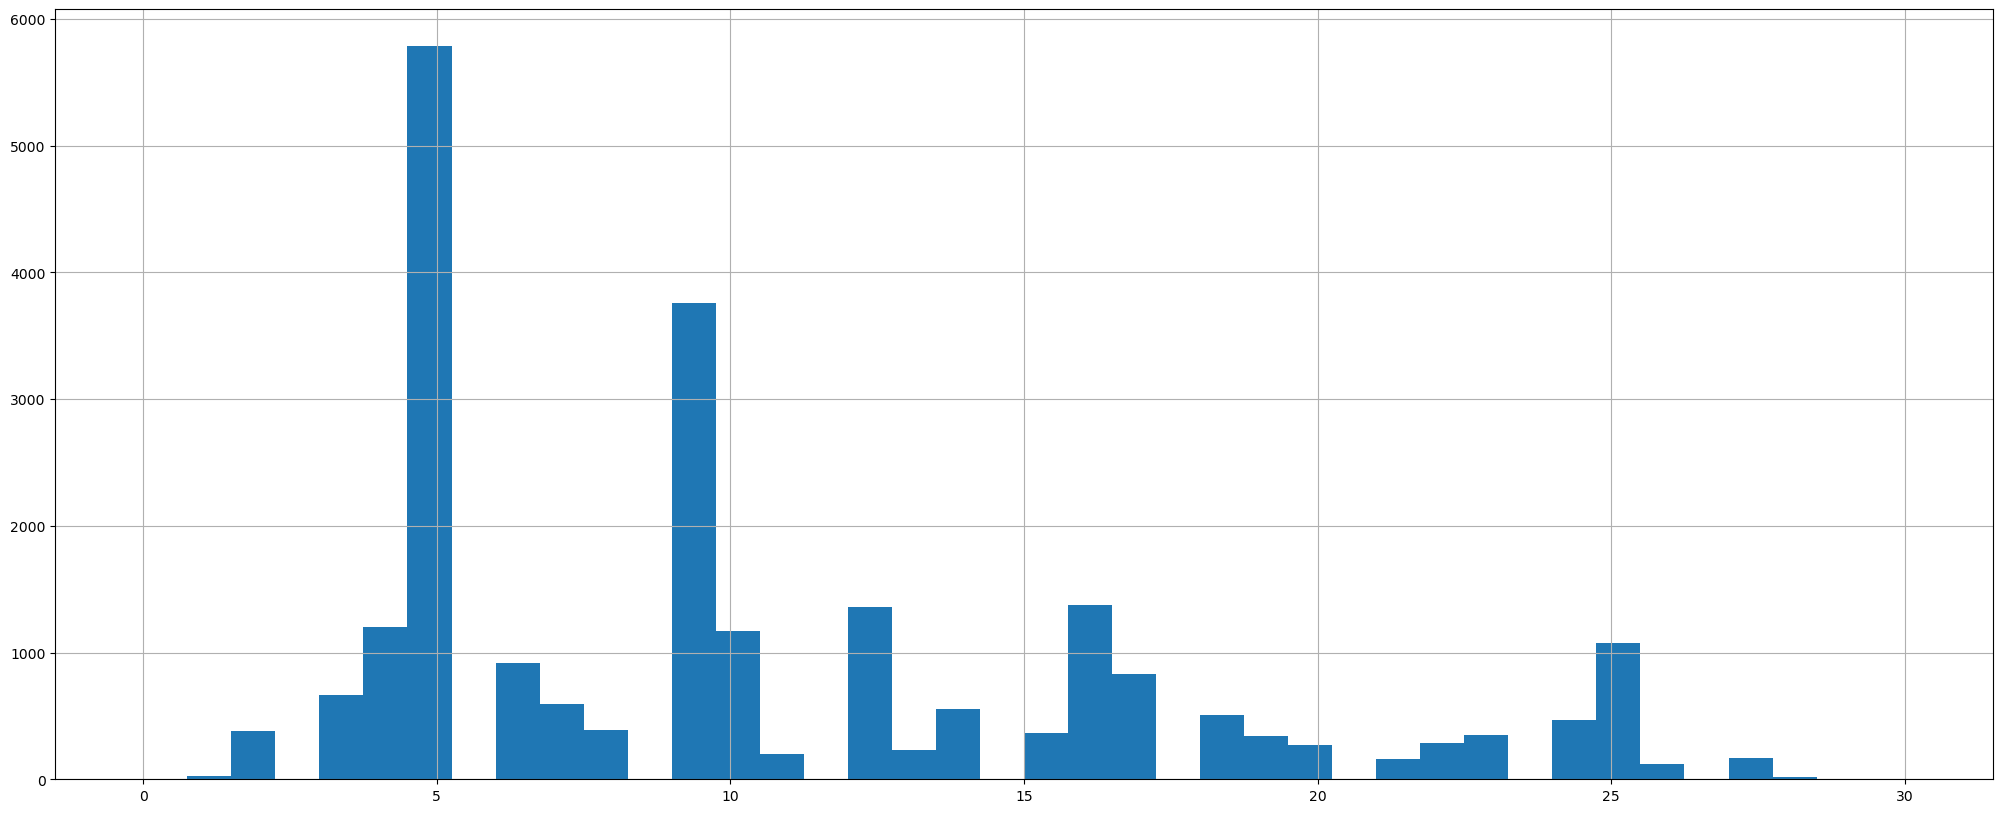

In [12]:
data['floors_total'].hist(bins='auto', figsize=(25,10), range=(0,30))

In [13]:
data['floors_total'].describe()

count   23,613.0
mean        10.7
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

<AxesSubplot:>

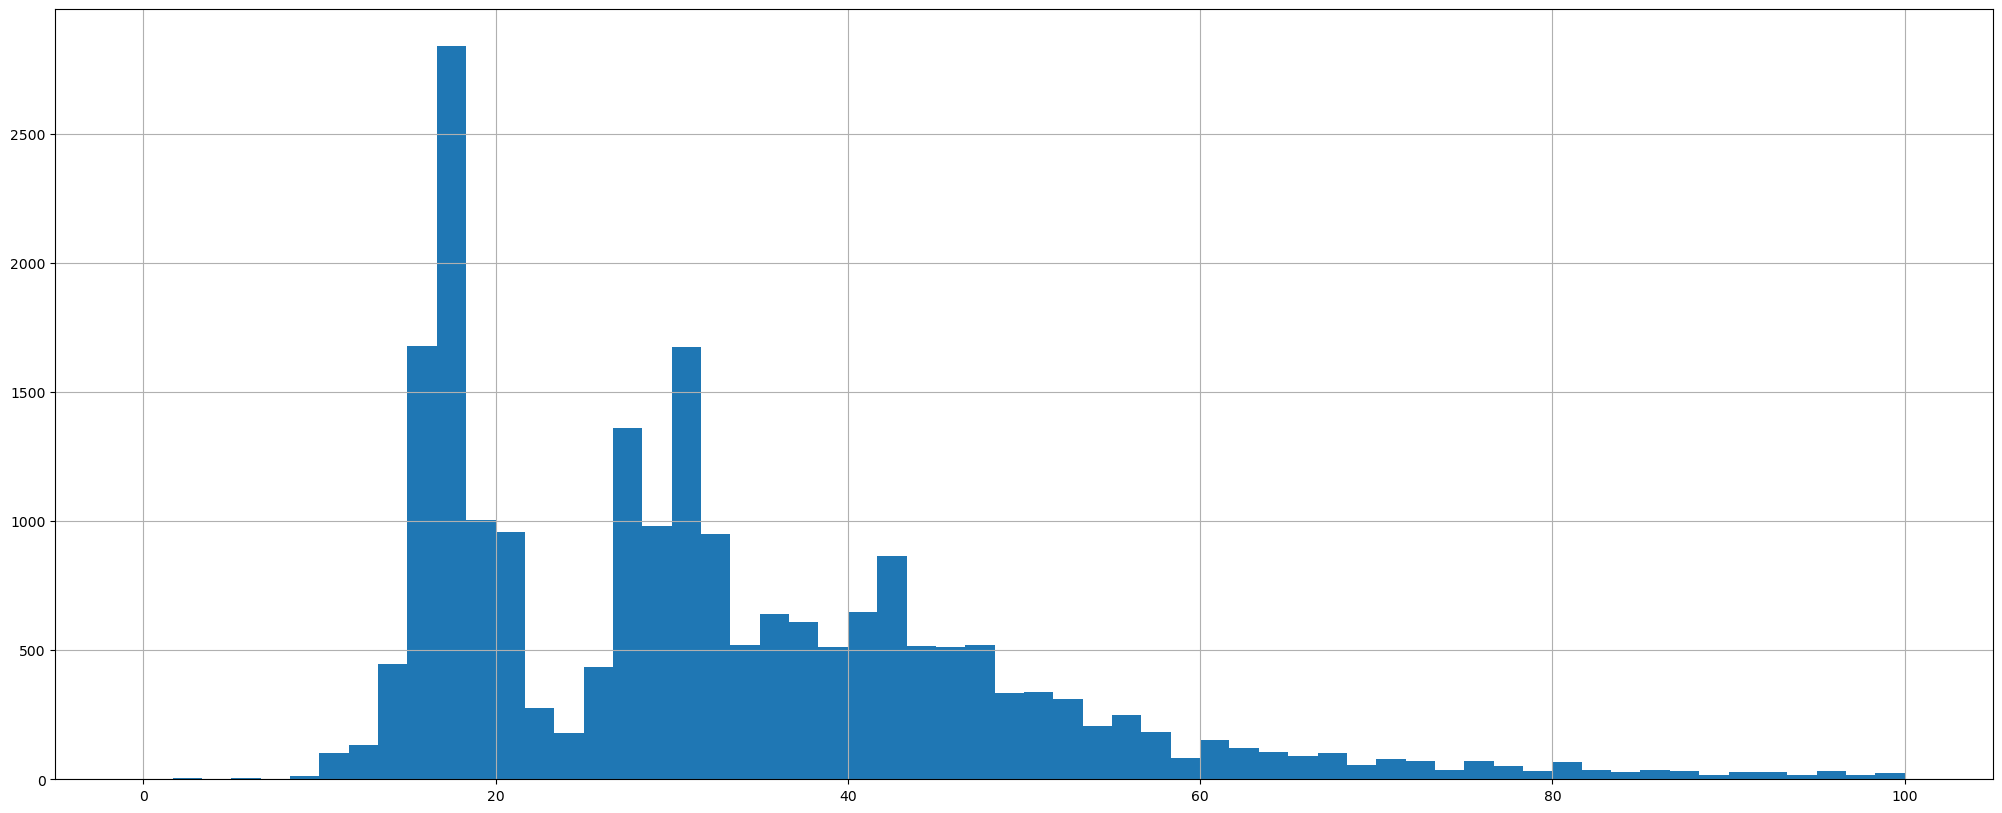

In [14]:
data['living_area'].hist(bins='auto', figsize=(25,10), range=(0,100))

In [15]:
data['living_area'].describe()

count   21,796.0
mean        34.5
std         22.0
min          2.0
25%         18.6
50%         30.0
75%         42.3
max        409.7
Name: living_area, dtype: float64

<AxesSubplot:>

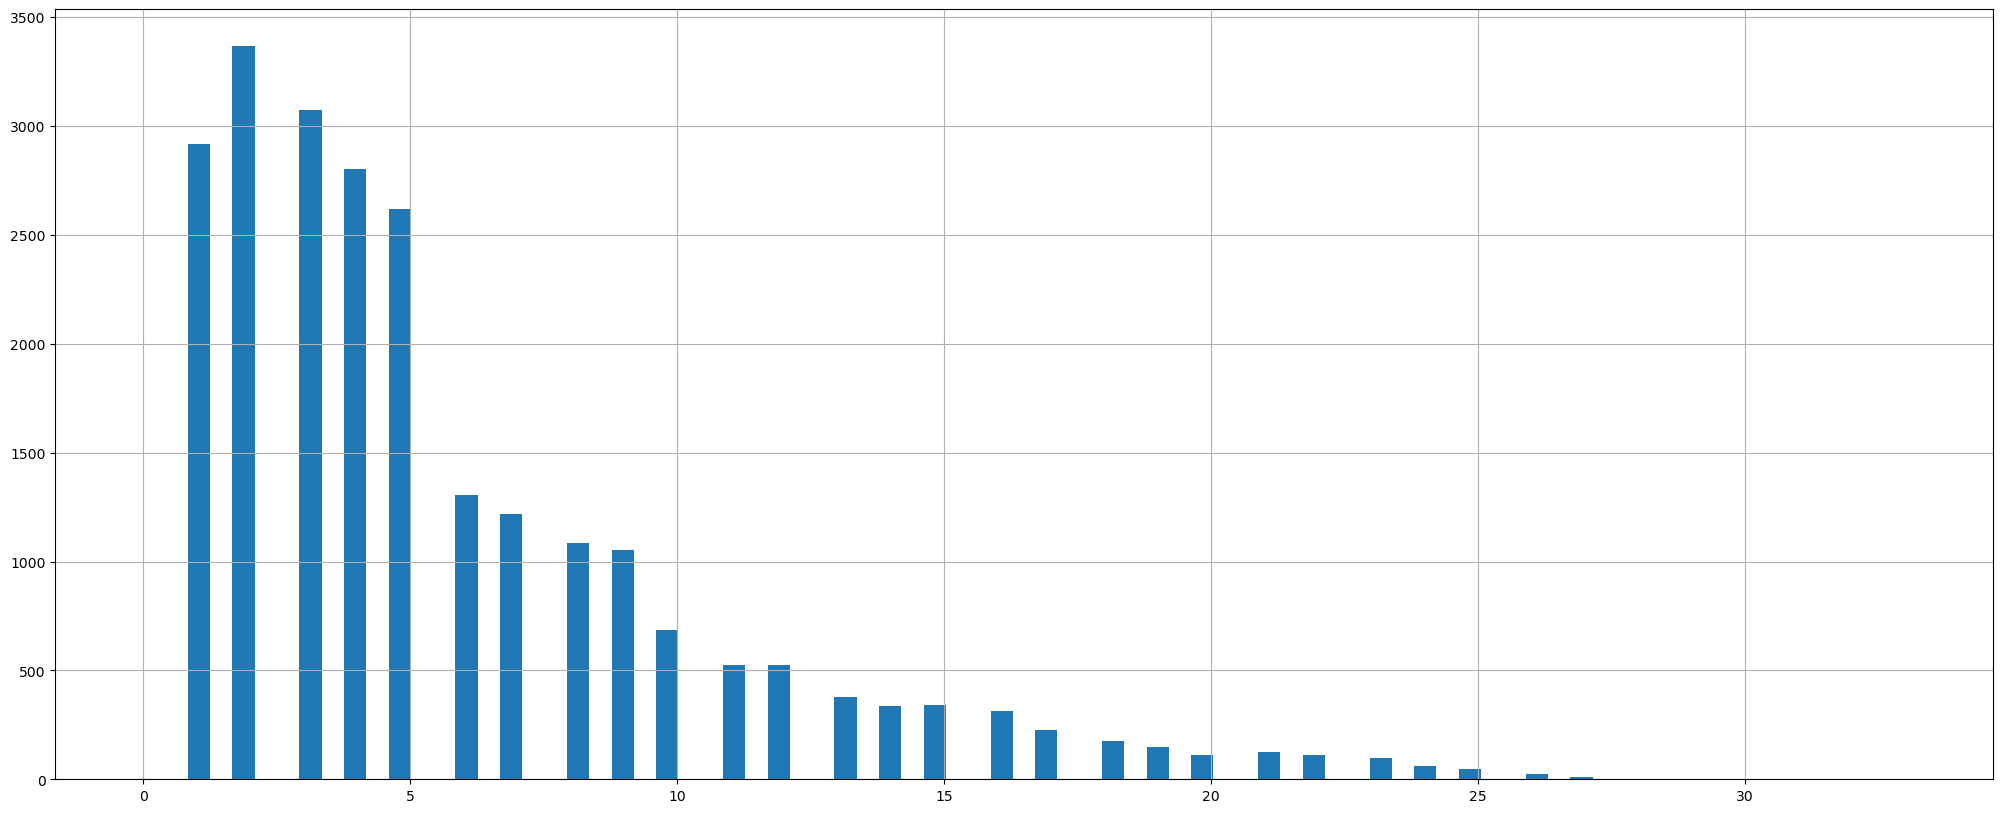

In [16]:
data['floor'].hist(bins='auto', figsize=(25,10), range=(0,33))

In [17]:
data['floor'].describe()

count   23,699.0
mean         5.9
std          4.9
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

## Предобработка данных

### Поиск пропусков

In [18]:
display(data.isnull().sum()) # ищем пропуски по столбцам
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # Проверка на колличество пропусков в % 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [19]:
# Высота потолка в болинстве строений стандартная, поэтому следует заменить пропуски медианной величиной

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isnull().sum() # проверка


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [20]:
# в количестве этажей здания пропусков мало и их тоже можно заменить медаинным значением
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data.isnull().sum() # проверка



total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

медианная площадь жилого помещения для аппартаментов 33.25
медианная площадь жилого помещения для студий 18.0
медианная площадь жилого помещения для открытой планировки 18.05


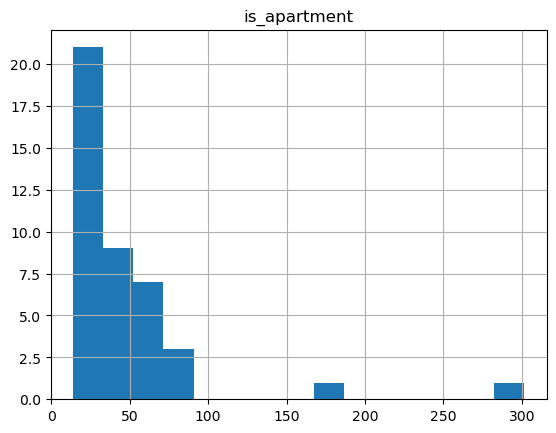

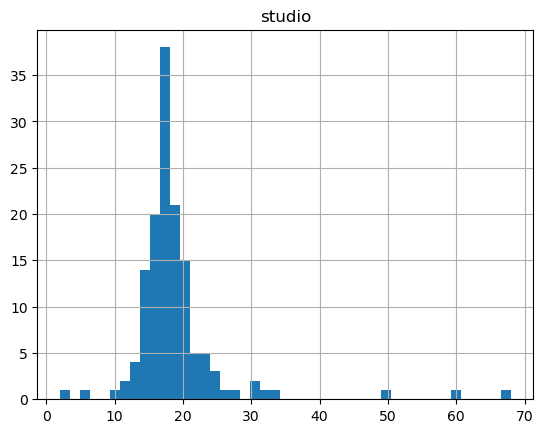

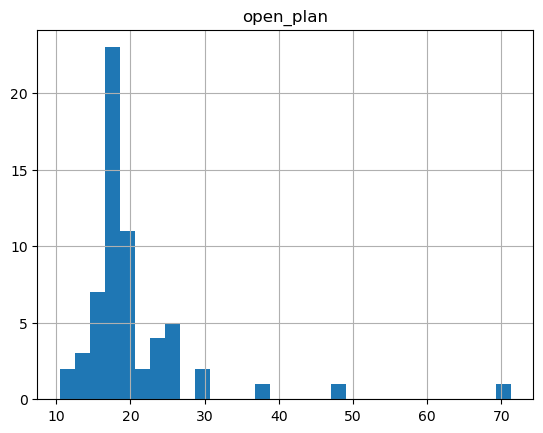

In [21]:
# жилая площадь зависит от типа помещения, посмотрим медианы по эти типам
data.query('is_apartment == True').hist('living_area', bins='auto')
plt.title('is_apartment')
# медиана для данного типа помещения
data_ap = data.query('is_apartment == True')
med_ap = data_ap['living_area'].median()
print(f'медианная площадь жилого помещения для аппартаментов {med_ap}')

data.query('studio == True').hist('living_area', bins='auto')
plt.title('studio')
# медиана для данного типа помещения
data_ap = data.query('studio == True')
med_st = data_ap['living_area'].median()
print(f'медианная площадь жилого помещения для студий {med_st}')

data.query('open_plan == True').hist('living_area', bins='auto')
plt.title('open_plan')
# медиана для данного типа помещения
data_ap = data.query('open_plan == True')
med_op = data_ap['living_area'].median()
print(f'медианная площадь жилого помещения для открытой планировки {med_op}')


In [22]:
room_living_area = data.pivot_table(index = 'rooms',values='living_area',aggfunc=('median','count'))
room_living_area

,count,median
rooms,,
0,183,18.0
1,7388,17.6
2,7296,30.5
3,5366,45.0
4,1089,63.6
5,292,91.8
6,99,123.9
7,53,145.0
8,12,161.0


In [23]:
# пропуски в жилой площади и площади кухни можно найти путем вычетания из общей площади известнок значение 
for index in data.index:
    data.loc[(data['total_area'].index==index)&(data['kitchen_area'].isna() == True) & (data['living_area'].isna() == False), 'kitchen_area'] = data.loc[(data['total_area'].index==index),'total_area'] - data.loc[(data['living_area'].index==index), 'living_area']
    data.loc[(data['total_area'].index==index)&(data['kitchen_area'].isna() == False) & (data['living_area'].isna() == True), 'living_area'] = data.loc[(data['total_area'].index==index), 'total_area'] - data.loc[(data['kitchen_area'].index==index), 'kitchen_area']
data.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1464
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             1464
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [24]:
# для заполнения оставшися пропусков в living_area используем медианы сгруппированные по количеству комнат 
for room in data['rooms']:
    data.loc[(data['rooms']==room)&(data['living_area'].isna()==True),'living_area'] = data.loc[(data['rooms']==room),'living_area'].median()
data.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             1464
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

медианная площадь жилого помещения для аппартаментов 33.25
медианная площадь жилого помещения для студий 18.0
медианная площадь жилого помещения для открытой планировки 18.0


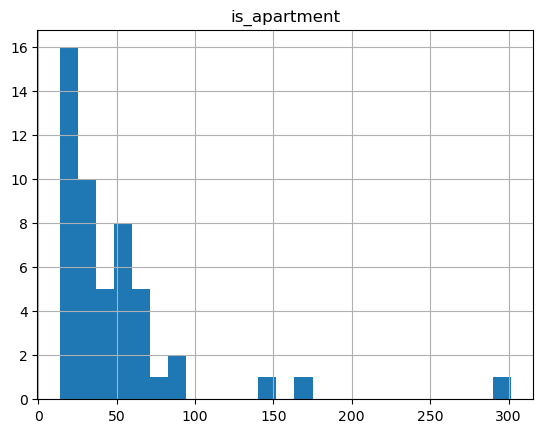

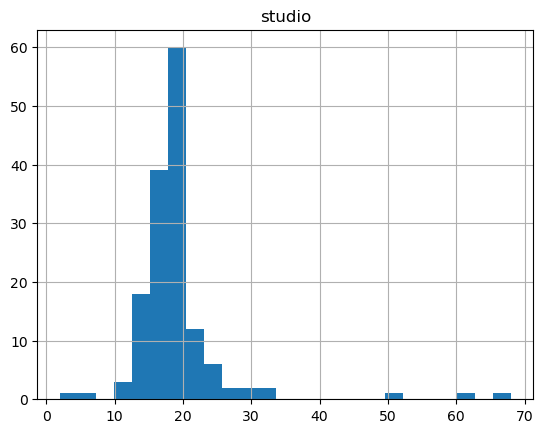

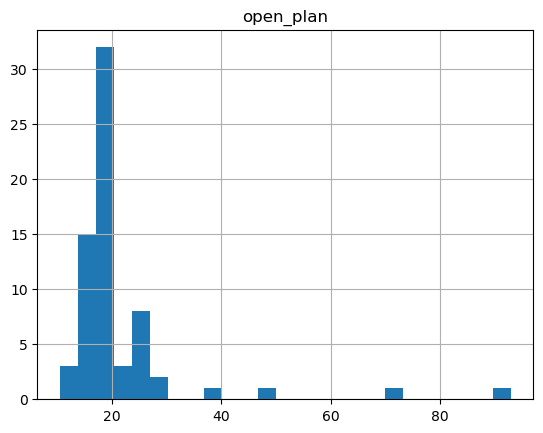

In [25]:
# жилая площадь зависит от типа помещения, посмотрим медианы по эти типам
data.query('is_apartment == True').hist('living_area', bins=25)
plt.title('is_apartment')
# медиана для данного типа помещения
data_ap = data.query('is_apartment == True')
med_ap = data_ap['living_area'].median()
print(f'медианная площадь жилого помещения для аппартаментов {med_ap}')

data.query('studio == True').hist('living_area', bins=25)
plt.title('studio')
# медиана для данного типа помещения
data_ap = data.query('studio == True')
med_st = data_ap['living_area'].median()
print(f'медианная площадь жилого помещения для студий {med_st}')

data.query('open_plan == True').hist('living_area', bins=25)
plt.title('open_plan')
# медиана для данного типа помещения
data_ap = data.query('open_plan == True')
med_op = data_ap['living_area'].median()
print(f'медианная площадь жилого помещения для открытой планировки {med_op}')

In [26]:
print(len(data.query('(is_apartment.isna() == True) and (studio == False) and (open_plan == True)') ) ) #проверка сколько строк с значением NaN в столбце is_apartment и True в столбце open_plan 
print(len(data.query('(is_apartment.isna() == True) and (studio == True) and (open_plan == False)') ))  #проверка сколько строк с значением NaN в столбце is_apartment и True в столбце studio   

# заполняем пропуски в столбце is_apartment значением False в тех случаях кгда известно что в другом типе помещения стоит значение True
data.loc[(data['is_apartment'].isna() == True) & (data['studio'] == False) & (data['open_plan'] == True), 'is_apartment'] = False
data.loc[(data['is_apartment'].isna() == True) & (data['studio'] == True) & (data['open_plan'] == False), 'is_apartment'] = False
data.isnull().sum() # проверка

60
134


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20730
studio                      0
open_plan                   0
kitchen_area             1464
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [27]:
#  в столбце balcony заменим пропуски 0
data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20730
studio                      0
open_plan                   0
kitchen_area             1464
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [28]:
# в locality_name всего 49 пропусков, можно смело удалить эти строки
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20696
studio                      0
open_plan                   0
kitchen_area             1460
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [29]:
# можно предположить что оставшиеся пропуски в is_apartment это обычные квартиры, поэтому заполним эти пропуски False
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1460
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [30]:
# заменим медианами для каждго топа жилья kitchen_area
data.loc[(data['kitchen_area'].isna()==True)&(data['studio']==True),'kitchen_area'] = data.loc[(data['studio']==True),'kitchen_area'].median()
data.loc[(data['kitchen_area'].isna()==True)&(data['open_plan']==True),'kitchen_area'] = data.loc[(data['open_plan']==True),'kitchen_area'].median()

data.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1445
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

count   22,205.0
mean        10.9
std          6.8
min          0.0
25%          7.0
50%          9.3
75%         12.0
max        230.0
Name: kitchen_area, dtype: float64

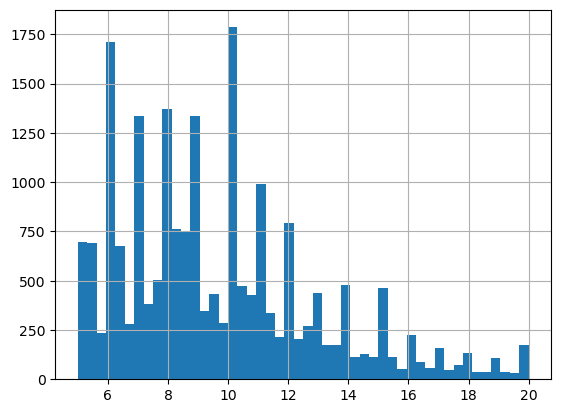

In [31]:
# как выглядит распределение с пропусками
data['kitchen_area'].hist(bins='auto',range=(5,20))
data['kitchen_area'].describe()

count   23,650.0
mean        10.8
std          6.6
min          0.0
25%          7.2
50%          9.3
75%         12.0
max        230.0
Name: kitchen_area, dtype: float64

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

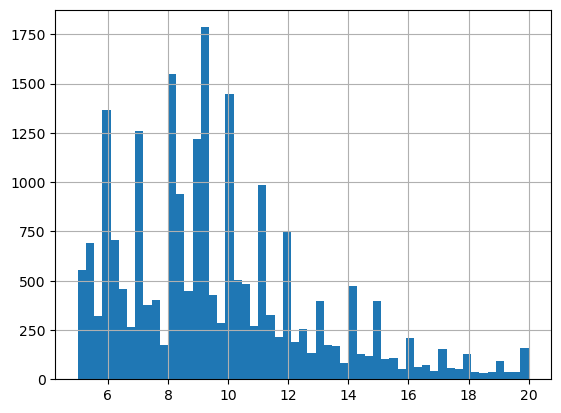

In [32]:
# замена пропусков на медиану 
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
# проверка насколько изменились данные
data['kitchen_area'].hist(bins='auto',range=(5,20))
display(data['kitchen_area'].describe())
data.isnull().sum() # проверка

In [33]:
# пропуски в days_exposition никак не заменить , возможно это обьявления которые еще не сняты, поэтому удалим эти строки
data = data.dropna(subset=['days_exposition']).reset_index(drop=True)
data.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4668
cityCenters_nearest      4646
parks_around3000         4646
parks_nearest           13551
ponds_around3000         4646
ponds_nearest           12601
days_exposition             0
dtype: int64

In [34]:
# Для поиска явных дупликатов приведем все к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

# поиск дупликатов
data.duplicated().sum()


0

<a id="явные_дупликаты"></a>

In [35]:
# для того чтобы заполнить пропуски в оставшихся столбцах ннеобходимо избавиться от неявных дупликатов в locality_name
data['locality_name'].unique()


array(['посёлок шушары', 'санкт-петербург', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский', 'павловск',
       'деревня пикколово', 'всеволожск', 'кингисепп', 'сестрорецк',
       'деревня куттузи', 'поселок городского типа ефимовский',
       'посёлок плодовое', 'деревня заклинье', 'поселок торковичи',
       'красное село', 'посёлок понтонный', 'сясьстрой',
       'посёлок новый свет', 'приозерск', 'сланцы', 'село путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'поселок новый свет', 'деревня оржицы',
       

In [36]:
#создадим функцию для удаления неявных дупликатов    
def locality_name_unite(row):
    
   
        if 'Янин' in row:
            return 'Янино'
       
        elif 'Мурин' in row:
            return 'Мурино'
        
       
        elif 'Кудров' in row:
            return 'Кудров'
        elif 'Коммунар' in row:
            return 'Коммунар'
        
        elif 'Красный Бор' in row:
            return 'Красный Бор'
       
        elif 'Фёдоров' in row:
            return 'Фёдоровское'

        elif 'Кузьмол' in row :
            return 'Кузьмоловский'
      
 
        
        elif 'Сясьстр' in row:
            return 'Сясьстрой'
        elif 'Нов' in row and 'Свет' in row:
            return 'Новый Свет'
        elif 'Бугр' in row:
            return 'Бугры'
        elif 'Рощин' in row:
            return 'Рощино'
        elif 'Павл' in row :
            return 'Павлово'
        elif 'Тервол' in row:
            return 'Терволово'
        elif 'Советск' in row:
            return 'Советский'
        elif 'Анн' in row:
            return 'Аннино'
        elif 'Токс' in row:
            return 'Токсово'
        elif 'Выриц' in row :
            return 'Вырица'
        elif 'Тельм' in row:
            return 'Тельмана'
         
        elif 'Бол' in row and 'Ижор' in row:
            return 'Большая Ижора'
        elif 'Зимит' in row:
            return 'Зимитицы'
        elif 'Свердлов' in row:
            return 'Свердлова'
        elif 'Рябов' in row:
            return 'Рябово'
        elif 'Бегун' in row:
            return 'Бегуницы'
        elif 'Мга' in row :
            return 'Мга'
        elif 'Ильич' in row:
            return 'Ильичёво'
        elif 'Вещев' in row:
            return 'Вещево'
        elif 'Калит' in row:
            return 'Калитино'
        elif 'Нов' in row and 'Ладог' in row:
            return 'Новая Ладога'
        elif 'Приладож' in row :
            return 'Приладожский'
  
        elif 'Щегл' in row:
            return 'Щеглово'
        elif 'Гаврил' in row:
            return 'Гаврилово'
        elif 'Лебяж' in row:
            return 'Лебяжье'
        elif 'Назия' in row:
            return 'Назия'
        elif 'Стар' in row and 'Малукс' in row:
            return 'Старая Малукса'
        elif 'Рахья' in row:
            return 'Рахья'
        elif 'Сапёр' in row:
            return 'Сапёрный'
        elif 'Поляны' in row:
            return 'Поляны'
        
        elif 'Мичурин' in row:
            return 'Мичуринское'
        elif 'Мельник' in row:
            return 'Мельниково'
        elif 'Стеклян' in row:
            return 'Стеклянный'
        elif 'Стар' in row and 'Ладог' in row:
            return 'Старая Ладога'
        elif 'Возрожд' in row :
            return 'Возрождение'
        elif 'Гарбол' in row:
            return 'Гарболово'
        elif 'Лис' in row and 'Нос' in row:
            return 'Лисий Нос'
        elif 'Жилгород' in row:
            return 'Жилгородок'
        
        elif 'Петровск' in row:
            return 'Петровское'
        elif 'Уст' in row and 'Луг' in row:
            return 'Усть-Луга'
        elif 'Кингисепп' in row:
            return 'Кингисеппский'
        elif 'Кобрал' in row:
            return 'Кобралово'
        elif 'Перов' in row :
            return 'Перово'
        elif 'Уст' in row and 'Ижор' in row:
            return 'Усть-Ижора'
        elif 'Гром' in row:
            return 'Громово'
        elif 'Зелён' in row and 'Бор' in row:
            return 'Зелёный Бор'        
        elif 'Русск' in row:
            return 'Русско'
        elif 'Нижн' in row:
            return 'Нижняя'
        elif 'Лесн' in row :
            return 'Лесное'        
        elif 'Тихков' in row:
            return 'Тихковицы'
        elif 'Борис' in row and 'Грив' in row:
            return 'Борисова Грива'
        elif 'Рабит' in row :
            return 'Рабитицы'  
        else:
            return row  

<a id='duplicates'></a>

In [37]:
data['locality_name_unite'] = data.loc[:,'locality_name'].apply(locality_name_unite) # создаем новый столбец с названиями населенных пунктов и передаем ему значения с помощью ранее написанной функции 

In [38]:
data # проверка датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unite
0,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,2.6,11.0,18.6,1,False,...,2.0,посёлок шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,посёлок шушары
1,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,2.6,5.0,34.3,4,False,...,0.0,санкт-петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,санкт-петербург
2,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,2.6,14.0,45.0,9,False,...,0.0,санкт-петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,санкт-петербург
3,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,0.0,санкт-петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,санкт-петербург
4,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,2.6,12.0,14.4,5,False,...,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,городской посёлок янино-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20465,11,"9,470,000.0",72.9,2016-10-13T00:00:00,2,2.8,25.0,40.3,7,False,...,1.0,санкт-петербург,"19,424.0","4,489.0",0.0,NaN,1.0,806.0,519.0,санкт-петербург
20466,2,"1,350,000.0",30.0,2017-07-07T00:00:00,1,2.6,5.0,17.5,4,False,...,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,тихвин
20467,9,"4,600,000.0",62.4,2016-08-05T00:00:00,3,2.6,9.0,40.0,8,False,...,0.0,петергоф,"45,602.0","34,104.0",1.0,352.0,1.0,675.0,239.0,петергоф
20468,14,"3,100,000.0",59.0,2018-01-15T00:00:00,3,2.6,5.0,38.0,4,False,...,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,тосно


In [39]:
# Теперь можем заполнить пропуски в столбцах связанных с прудами,аэропортами, парками и центрами города. 
# Для этого заменим медианами по населенному пункту эти столбцы 
for location in data['locality_name_unite'].unique():
    data.loc[(data['locality_name_unite'] == location)&(data['airports_nearest'].isna()==True),'airports_nearest'] = data.loc[(data['locality_name_unite'] == location),'airports_nearest'].median()
    data.loc[(data['locality_name_unite'] == location)&(data['cityCenters_nearest'].isna()==True),'cityCenters_nearest'] = data.loc[(data['locality_name_unite'] == location),'cityCenters_nearest'].median()    
    data.loc[(data['locality_name_unite'] == location)&(data['parks_around3000'].isna()==True),'parks_around3000'] = data.loc[(data['locality_name_unite'] == location),'parks_around3000'].median()    
    data.loc[(data['locality_name_unite'] == location)&(data['parks_nearest'].isna()==True),'parks_nearest'] = data.loc[(data['locality_name_unite'] == location),'parks_nearest'].median()    
    data.loc[(data['locality_name_unite'] == location)&(data['ponds_around3000'].isna()==True),'ponds_around3000'] = data.loc[(data['locality_name_unite'] == location),'ponds_around3000'].median()    
    data.loc[(data['locality_name_unite'] == location)&(data['ponds_nearest'].isna()==True),'ponds_nearest'] = data.loc[(data['locality_name_unite'] == location),'ponds_nearest'].median()    
data.isnull().sum() # проверка    

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4561
cityCenters_nearest     4561
parks_around3000        4561
parks_nearest           5127
ponds_around3000        4561
ponds_nearest           4659
days_exposition            0
locality_name_unite        0
dtype: int64

In [40]:
data.query('cityCenters_nearest.isna()') # все столбцы с пропусками расстояний каким то образом связаны, чем заполнить эти пропуски я не знаю , поэтому их удалю



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unite
4,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,2.6,12.0,14.4,5,False,...,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,городской посёлок янино-1
6,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,2.6,27.0,15.4,26,False,...,0.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,посёлок мурино
10,10,"3,890,000.0",54.0,2016-06-30T00:00:00,2,2.6,5.0,30.0,5,False,...,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,сертолово
20,20,"5,000,000.0",58.0,2017-04-24T00:00:00,2,2.8,25.0,30.0,15,False,...,2.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,деревня кудрово
28,12,"2,200,000.0",32.8,2018-02-19T00:00:00,1,2.6,9.0,17.7,2,False,...,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,коммунар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20455,8,"2,450,000.0",35.0,2018-10-26T00:00:00,1,2.6,5.0,18.0,4,False,...,0.0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28.0,всеволожск
20457,0,"2,500,000.0",35.0,2017-12-08T00:00:00,1,2.6,9.0,17.7,4,False,...,0.0,сосновый бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,сосновый бор
20459,11,"2,350,000.0",35.6,2016-06-23T00:00:00,1,2.5,5.0,17.0,4,False,...,2.0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0,выборг
20466,2,"1,350,000.0",30.0,2017-07-07T00:00:00,1,2.6,5.0,17.5,4,False,...,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,тихвин


In [41]:
data = data.dropna(subset =['parks_nearest']).reset_index(drop=True) # удаляю оставшиеся пропуски
data.isnull().sum() # проверка   

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
locality_name_unite     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15343 entries, 0 to 15342
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          15343 non-null  int64  
 1   last_price            15343 non-null  float64
 2   total_area            15343 non-null  float64
 3   first_day_exposition  15343 non-null  object 
 4   rooms                 15343 non-null  int64  
 5   ceiling_height        15343 non-null  float64
 6   floors_total          15343 non-null  float64
 7   living_area           15343 non-null  float64
 8   floor                 15343 non-null  int64  
 9   is_apartment          15343 non-null  bool   
 10  studio                15343 non-null  bool   
 11  open_plan             15343 non-null  bool   
 12  kitchen_area          15343 non-null  float64
 13  balcony               15343 non-null  float64
 14  locality_name         15343 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0","15,343.0"
mean,9.8,"7,325,850.4",61.9,2.1,2.7,11.3,35.5,6.2,11.0,0.6,"29,161.6","13,935.5",0.6,475.9,0.8,513.0,183.0
std,5.7,"12,350,143.5",37.6,1.1,1.0,6.5,23.7,5.0,7.0,1.0,"12,662.1","8,376.6",0.8,236.5,0.9,198.7,224.2
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,208.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,990,000.0",40.9,1.0,2.6,5.0,19.0,3.0,7.2,0.0,"18,867.0","9,283.0",0.0,435.0,0.0,474.0,43.0
50%,9.0,"5,150,000.0",53.0,2.0,2.6,9.0,30.6,5.0,9.3,0.0,"27,189.0","12,971.0",0.0,459.0,1.0,506.0,96.0
75%,14.0,"7,400,000.0",71.0,3.0,2.7,16.0,43.2,8.0,12.0,1.0,"37,536.5","16,022.0",1.0,459.0,1.0,539.0,233.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,460.0,33.0,230.0,5.0,"81,607.0","62,706.0",3.0,"3,190.0",3.0,"1,344.0","1,572.0"


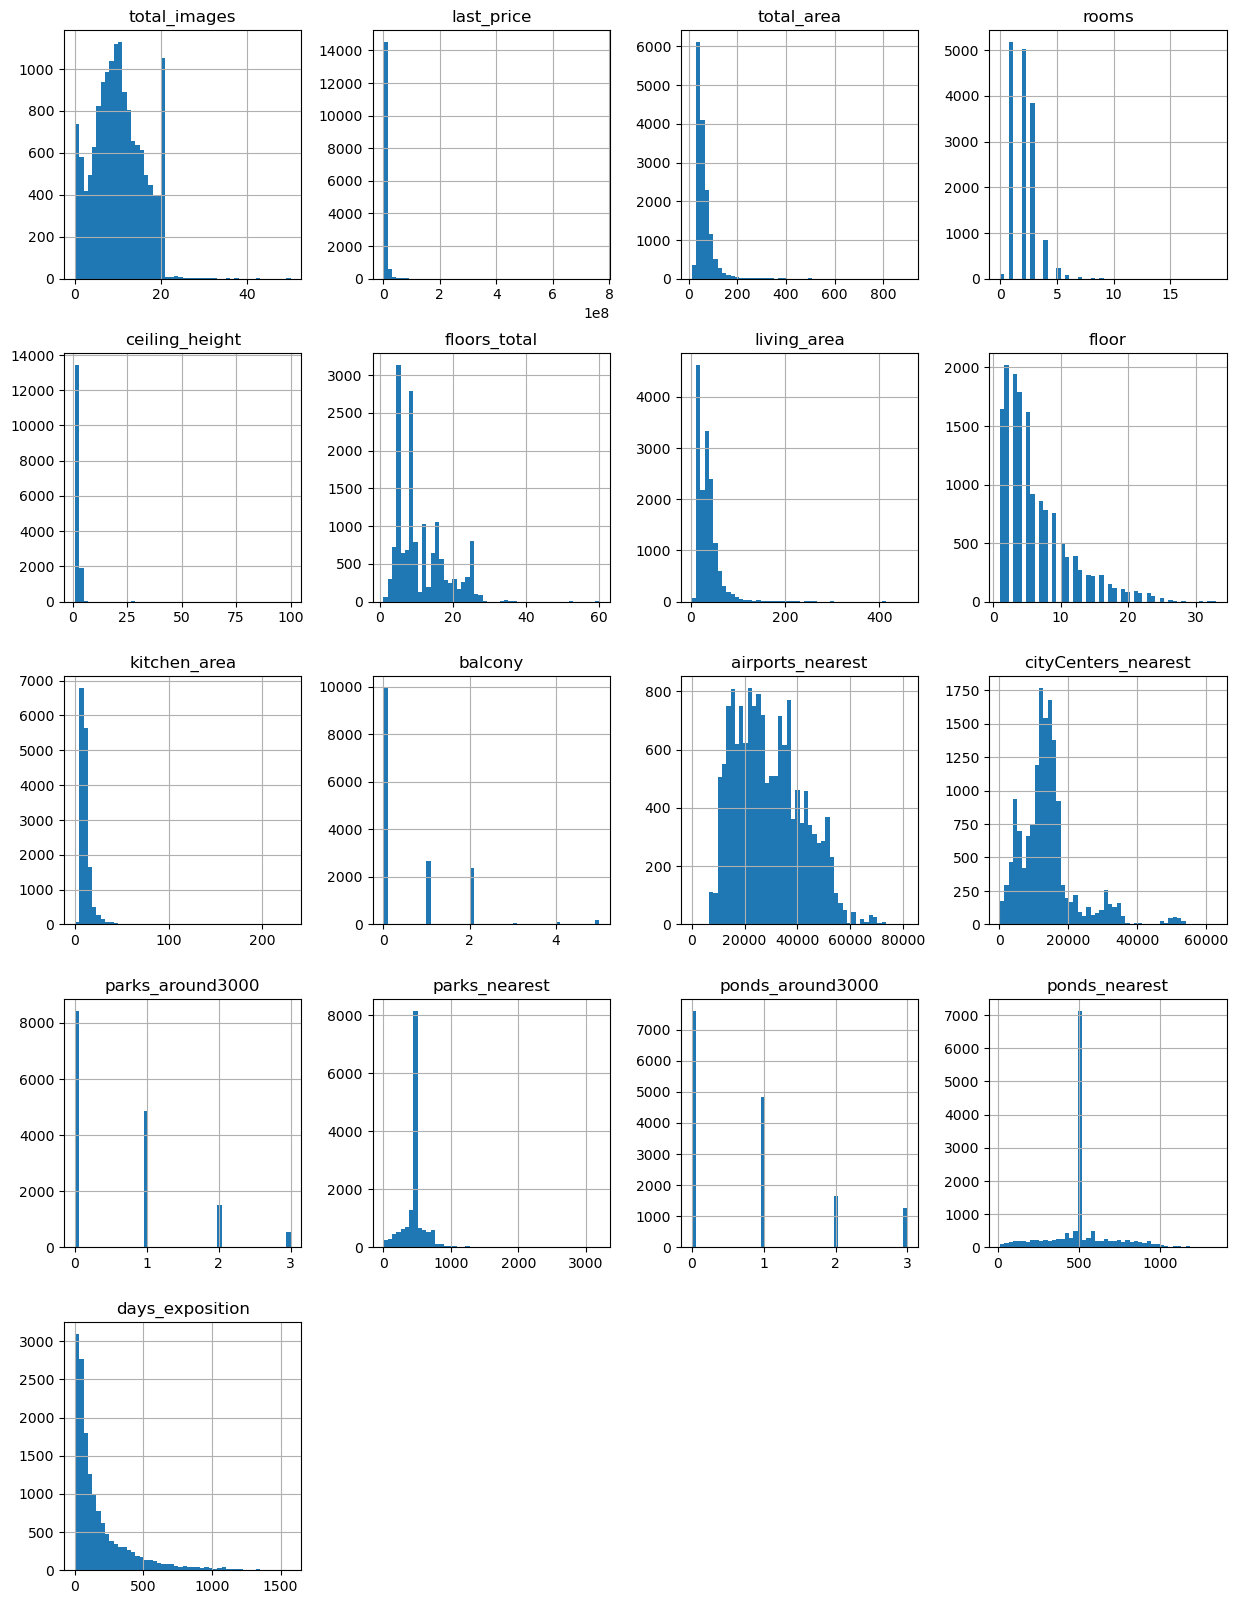

In [42]:
# сравниваем с изначальной информацией о датафрейме
data.info()
display(data.describe())
data.hist(bins=50,figsize=(15,20));

#### Результат обработки пропусков

В результате поиска пропусков датафрейм уменьшился на треть 

Инженерам, которые собирали даннные для датафрейма, следует обратить внимание на стобец  is_apartment, в нем слишком много занчений NaN
Также много пропусков (и они как то связаны) во всех столбцах с картографичесими данными: `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`     

### Поиск несоответствия в типах данных

In [43]:
# Неверный тип данных у столбца 'first_day_exposition'. Столбцы 'balcony','parks_around3000','parks_around3000','last_price' и "floors_total" типа float64 ,должно быть int
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [44]:
data['first_day_exposition'] #проверка

0       2015-08-20
1       2015-07-24
2       2018-06-19
3       2017-11-02
4       2017-02-26
           ...    
15338   2018-02-28
15339   2018-07-19
15340   2016-10-13
15341   2016-08-05
15342   2017-03-28
Name: first_day_exposition, Length: 15343, dtype: datetime64[ns]

In [45]:
data[['last_price','floors_total','balcony','parks_around3000','parks_around3000']] = data[['last_price','floors_total','balcony','parks_around3000','parks_around3000']].astype(int) #Столбцы 'balcony','parks_around3000','parks_around3000','last_price' и "floors_total" типа float64 приводим к int

ValueError: Columns must be same length as key

<a id="типы"></a>

In [ ]:
data[['last_price','floors_total','balcony','parks_around3000','parks_around3000']]

In [ ]:
data

#### Замена типов данных

Чтобы обращаться к столбцу `first_day_exposition`, а именно производить автоматизированные вычисления временных периодов, следует привести его к типу `datetime`.
Для более понятного отбражения значений столбцов `balcony`,`last_price` и `floors_total`,`parks_around3000`,`parks_around3000` приведем их к типу int

### Поиск неявных дупликатов

Ранее мы уже проделали поиск неявных дубликатов
[duplicates](#duplicates)

### Поиск аномалий

In [ ]:
display(data.describe())

In [ ]:
# визуализируем разбросы значений с помощью boxplot

data.boxplot(column ='last_price',figsize=(10,10))
plt.show()
data.boxplot(column =['total_area','living_area','kitchen_area'],figsize=(10,10))
plt.show()
data.boxplot(column ='rooms',figsize=(10,10))
plt.show()
data.boxplot(column ='ceiling_height',figsize=(10,10))
plt.show()
data.boxplot(column =['floors_total','floor'],figsize=(10,10))
plt.show()
data.boxplot(column ='balcony',figsize=(10,10))
plt.show()
data.boxplot(column =['parks_around3000','ponds_around3000'],figsize=(10,10))
plt.show()
data.boxplot(column =['parks_nearest','ponds_nearest'],figsize=(10,10))
plt.show()
data.boxplot(column =['cityCenters_nearest','airports_nearest'],figsize=(10,10))
plt.show()
data.boxplot(column ='days_exposition',figsize=(10,10))
plt.show()

In [ ]:
data.columns

In [ ]:
# также посмотрим в отдельности распределение каждой величины
data['last_price'].hist(bins='auto',range=(0,10000000),figsize=(20,10))

In [ ]:
display(data.query('last_price < 200000')) # так как верхнего потолка у стоимости жилых помещений нет, попробуем найти аномально нихкую стоимость
# скорее всего это человеческая ошибка в указании цены, проверим сколько стоит в среднем двухкомнаткая квартира, с общей площадью от 80 до 120 кв.м. и расстояни и до центра города от 5 до 15 км.
data_last_price = data.query('(rooms == 2) and (total_area >80) and (total_area<120) and (cityCenters_nearest>5000) and (cityCenters_nearest<15000)')
data_last_price['last_price'].median()

In [ ]:
# в результате средняя цена на такую квартиру 11 967 787р, а цена на нашу квартиру 12 190р, считаю целесообразно добавить к сумме три нуля
data.loc[5687,['last_price']] = data.loc[5687,'last_price']*1000

In [ ]:
data.loc[5687,['last_price']] # проверка

In [ ]:
data['last_price'].describe() # на разброс и средние показатели эта корректировка не сильно повлияла

In [ ]:
data['ceiling_height'].describe()

In [ ]:
data['ceiling_height'].hist(bins='auto',figsize=(20,10) )

In [ ]:
display(data.query('ceiling_height <2'))# здесь слишком низкие потолки, следует заменить на медианное значение
display(data.query('ceiling_height >10'))# здесь слишком высокие потолки, следует заменить на медианное значение, если высота не может быть изменена до приемлемой величины путем изменения разрядности
for index in data.index:
    if data.loc[index,'ceiling_height'] < 2:
        data.loc[index,'ceiling_height']  = data['ceiling_height'].median()
if data.loc[index,'ceiling_height'] > 30:
    
    data.loc[index,'ceiling_height'] = data['ceiling_height'].median()
for index in data.index:
    if data.loc[index,'ceiling_height'] > 10:
        data.loc[index,'ceiling_height'] = data.loc[index,'ceiling_height'] / 10
if data.loc[index,'ceiling_height'] < 2:# повторим для значений, колторые попали в диапозон от 10 до20 метров        
    data.loc[index,'ceiling_height']  = data['ceiling_height'].median()
display(data.query('ceiling_height > 10'))
display(data.query('ceiling_height <2'))

In [ ]:
data['ceiling_height'].describe()

In [ ]:
data['ceiling_height'].hist(bins='auto',figsize=(20,10))

In [ ]:
data['kitchen_area'].describe()
data.hist(column='kitchen_area',bins='auto',figsize=(20,10), range=(0,25))

In [ ]:
data.query('kitchen_area<5')# по нормативам кухня должн занимать не меньше 5 кв. м

In [ ]:
#удалим из датасета строки с кухней меньше 5 кв.м
data = data.query('kitchen_area>5')


In [ ]:
data['living_area'].describe()

In [ ]:
data.hist(column=['living_area','total_area'],bins='auto',figsize=(20,10))

In [ ]:
display(data.query('living_area <10'))# есть ли квартиры в которых невозможно жить 
# есть подозрительно маленькие значения жилой площади с учетом количества комнат, заменим эти ячейки медианным значением для данного количества комнат
for room in data['rooms']:
    data.loc[(data['rooms']==room)&(data['living_area']<= 3),'living_area'] = data.loc[(data['rooms']==room),'living_area'].median()

display(data.query('living_area >total_area')[['total_area','kitchen_area','living_area']])# посмотрим есть ли общие площади меньшие жилой площади
# удалим эти аномалии
data = data.query('living_area < total_area')


In [ ]:
data['airports_nearest'].describe()

In [ ]:
data.hist(column='airports_nearest',bins='auto',figsize=(20,10))

In [ ]:
# нулевым значение расстояния до аэропорта не может быть
data.query('airports_nearest < 500')
# удалим эту строку 
data = data.query('airports_nearest >0')
              

In [ ]:
data['days_exposition'].describe()

In [ ]:
data.hist(column='days_exposition',bins='auto',figsize=(20,10))

In [ ]:
data.query('days_exposition > 1300')

In [ ]:
data.query('rooms == 0 and studio == True')# проверим сколько помещений с 0 комнат являются студией

In [ ]:
print(f'количество помещений без комнат типа "студия" или "открытая планировка" : {len(data.query("rooms == 0 and (studio == True or open_plan == True)"))}')
print(f'количество помещений без комнат: {len(data.query("rooms == 0"))}')

In [ ]:
data.info()

#### Особенности обнаруженые в ходе поиска аномалий:

В некоторых строках значения площади жилого помещения больше чем общая площадь. Возможно это произошло в результате заполнения медианными значениями пропусков

В столбце `rooms` ость занчения 0, считаю это не аномалия, возможно это квартиры студии

В данных есть много выбивающихся значений но без четкой цели, считаю невозможным их удалять из датафрейма, потому что они хоть и редки, но имеют место быть.

## Обновляем датафрейм добавляя в него новые столбцы

In [ ]:
#цена одного квадратного метра
data['sqr_metr_price'] = data['last_price']/data['total_area']
data['sqr_metr_price'] = data['sqr_metr_price'].astype('int')
data

In [ ]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday
data

In [ ]:
#месяц публикации объявления
#год публикации объявлени
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data


In [ ]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
for index in data.index:
    if  data.loc[index,'floor'] == 1:
        data.loc[index,'floor_category'] = 'первый'
    elif  data.loc[index,'floor'] == data.loc[index,'floors_total']:
        data.loc[index,'floor_category'] = 'последний'
    else:
        data.loc[index,'floor_category'] = 'другой'

In [ ]:
data['floor_category'].value_counts()


In [ ]:
#расстояние до центра города в километрах в км.
data['distance_to_center'] = data['cityCenters_nearest']/1000
data['distance_to_center'] = data['distance_to_center'].astype('int')
data

## Исследовательский анализ данных

In [ ]:
data_for_matrix = data[['last_price','total_area','living_area','kitchen_area','rooms','ceiling_height','floor','floor_category','floors_total','cityCenters_nearest','airports_nearest','parks_nearest','weekday','month_exposition']]

data_for_matrix.hist(bins='auto',figsize=(20,10));

In [ ]:
data['last_price'].hist(bins='auto', range=(1000000,20000000))
data['last_price'].describe()

 Вполне ожидаемая картина: основная масса предложений сконцентрирована между 2,5 млн и 7,5 млн.
 
 Наиболее часто встречающаяся цена 5,2 млн.
 
 Имеется длиный хвост редких значений до 763 млн.


In [ ]:
data['total_area'].hist(bins='auto', range=(10,150))
data['total_area'].describe()

Медианная общая площадь равна 53.1 кв.м.

Значения сконцентрированы между 30 кв. м и 70 кв. м.

Также имеется длиный хвост редких значений до 900 кв.м.

In [ ]:
data['living_area'].hist(bins='auto', range=(0,100))
data['living_area'].describe()

Интересно что имеется два частотных пика: один у отметки в 19 кв. м, другой на медианном значении в 30.6 кв.м

Настораживает провал после 20 кв.м, но он был и до предобработки данных. 
 
Хвост редких значений достигает 460 кв. м.

In [ ]:
data['kitchen_area'].hist(bins='auto', range=(5,30))
data['kitchen_area'].describe()

In [ ]:
data['kitchen_area'].value_counts().head(10) # посмотрим что за пики на этой гистограме


Здесь имеется похожий, похожий на провал в жилой площади

Максимальная площадь достигает 230 кв. м.

Медиана равна 9.3 кв. м. 

Есть выделяющиеся пики, предполагаю что это округленые значения.

In [ ]:
data['rooms'].hist(bins='auto', range=(0,10))
data['rooms'].describe()

Есть доля помещений, в которых количество комнат отображено как 0.
Мы условились что это не аномалия, а особенность помещений типа студия или открытая планировка.

Самые популярные количества комнат : 1,2,3

Медианное значение: 2

Максимальное количество: 19

In [ ]:
data['ceiling_height'].hist(bins=25, range=(2,4))
data['ceiling_height'].describe()

Самые популярные высоты потолков : 2.6 и 2,7 метра.

Медианное значение: 2.6

Максимальная высота: 2.7

In [ ]:
data['floor'].hist(bins='auto', range=(0,25))
data['floor'].describe()

Чем выше этаж тем реже он встречается, это обусловленно количством высотных зданий.

Самые распространенные 2,3,4 этажи.

Медианное значение: 5

Максимальное значение: 33

In [ ]:
data['floor_category'].hist(bins='auto')
data['floor_category'].describe()

Первых этажей меньше чем последних . Их малое присутствие обусловлено самой категоризацией.

In [ ]:
data['floors_total'].hist(bins='auto', range=(0,30))
data['floors_total'].describe()

 В ленобласти самые полурные здания: 5- этажные и 9-этажные
 Одноэтажных зданий очень мало.

In [ ]:
data['cityCenters_nearest'].hist(bins='auto')
data['cityCenters_nearest'].describe()

Распределение имеет группировку с выраженными пиками, возможно концентрация значений в начале графика связана с тем, что в ленобласти множество небольших городов.
Также можно предположить, что самый густонаселенный город - Питер, значит большое количество людей будут указыват расстояние до его центра. Согласно карте радиус от центра Питера до его окраин в среднем 20 км. 

Медианное расстояние равно 13 км.

Максимальное - 63км

In [ ]:
data['airports_nearest'].hist(bins='auto')
data['airports_nearest'].describe()

В ленинградской области один аэропорт Пулково, поэтому график выглядит так однородно.

Медианное значение 27км

Максимальное расстояние 81 км

Минимальное расстояние 6,5 км

In [ ]:
data['parks_nearest'].hist(bins='auto', range=(0,1000))
data['parks_nearest'].describe()

Распределение довольно широкое и раномерное с ярко выделяющимся пиком.

Отметим что медиана совпадает с третьим квартилем и равна 459 м, что говорит об ассиметричном распределении влево.

Минимальное расстояние 1 м.

Максимальное расстояние 3 км.

In [ ]:
data['weekday'].hist(bins='auto')
data['weekday'].describe()

По гистограмме видно что в выходные публикуют обьявления в два раза меньше раз

In [ ]:
data['month_exposition'].hist(bins=24)
data['month_exposition'].describe()

По графику видно что пик публикаций приходится на февраль, а минимальное количство обьявлений публикунтся в мае.

### Как быстро продавались квартиры?

In [ ]:

data.boxplot(column ='days_exposition',figsize=(10,10))
plt.show()
data['days_exposition'].describe()

In [ ]:
data['days_exposition'].hist(bins="auto")

Среднее время нахождения обьявления на сайте 183.5 дня.

Наиболее часто встречающееся время размещения обьявления 96 дней. 

Для времени продажи можно считать нормальными значения, которые находятся в пределах усов boxplot, а именно от 0 до 520 дней. Все что больше можно считать выбросами.
БОльшая часть обьявлений закрываются спустя 43 -234 дня, что соответствует межквартильному диапозону. 

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Приведем критерии по которым будем оенивать влияние факторов на полную стоимость:
>Корреляция по критерию Пирсона:
>>слабая -- 0,1-0,3

>>умереная -- 0,3-0,5

>>заметная -- 0,5-0,7

>>высокая -- 0,7-0,9

>>весьма высока -- 0,9-1,0



    

In [ ]:
data_for_matrix = data[['last_price','total_area','living_area','kitchen_area','rooms','floor_category','weekday','month_exposition','year_exposition']]

data_for_matrix.corr()


In [ ]:
data.plot(x='total_area', y='last_price', kind='scatter',alpha=0.4, sharex=False, figsize=(10,10),grid=True)

Корреляция заметная corr = 0.6

In [ ]:
data.plot(x='living_area', y='last_price', kind='scatter',alpha=0.4, sharex=False, figsize=(10,10),grid=True)

Корреляция заметная corr = 0.6

In [ ]:
data.plot(x='kitchen_area', y='last_price', kind='scatter',alpha=0.2, sharex=False, figsize=(10,10),grid=True)

Корреляция заметная corr = 0.5

In [ ]:
data.plot(x='rooms', y='last_price', kind='scatter',alpha=0.4, sharex=False, figsize=(10,10),grid=True)

Корреляция умеренная corr = 0.4

In [ ]:
data.plot(x='floor_category', y='last_price', kind='scatter',alpha=0.4, sharex=False, figsize=(10,10),grid=True)

Судя по графику, можно сказать что на цену влияет этаж, если он последний или первый.

Цена за первый этаж ниже чем за последний и обе эти категории стоят дешевле чем остальные этажи

In [ ]:
data.plot(x='weekday', y='last_price', kind='scatter',alpha=0.7, sharex=False, figsize=(10,10),grid=True)

In [ ]:
data.plot(x='month_exposition', y='last_price', kind='scatter',alpha=0.7, sharex=False, figsize=(10,10),grid=True)

In [ ]:
data.plot(x='year_exposition', y='last_price', kind='scatter',alpha=0.7, sharex=False, figsize=(10,10),grid=True)

Корреляция слабая отрицательная corr = -0.1

#### Параметры наиболее явно влияющие на цену

Судя по данным иследования, сильнее всего стоимость помещения зависит от общей площади и жилой площади.

Сильное влияние, но чуть меньше оказывает площадь кухни.

Еще слабее влияет количество комнат.

Слабую обратную корреляцию дает распределение по годам.

Также на цену влияет категория этажей (первый, последний, другой)

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
# найдем топ-10 населенных пунктов по количству обьявлений и выведем среднюю стоимость квадратного метра для каждго населенного пункта

sorting_price_by_region = data.pivot_table(index='locality_name',values='sqr_metr_price',aggfunc=('median','count')).sort_values(by='count',ascending=False)
print('Топ-10 населенных пунктов по количеству обьявлений:')
display(sorting_price_by_region.head(10))

max_price = sorting_price_by_region['median'].max()
min_price = sorting_price_by_region['median'].min()

print(f'Самый дорогой квадратный метр:{max_price:,.1f} р. Находится в {sorting_price_by_region.sort_values(by="median",ascending=False).index[1]}  ')
print(f'Самый дешевый квадратный метр:{min_price:,.1f} р. Находится в {sorting_price_by_region.sort_values(by="median",ascending=False).index[-1]}  ')



                 

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра

In [ ]:

data_cityCenters = data.query('locality_name == "санкт-петербург"').groupby('distance_to_center')['last_price'].agg('mean').reset_index()

data_cityCenters['last_price'].hist(bins='auto',range=(1000,30000000), figsize=(20,10))
data_cityCenters.plot(x='distance_to_center', y='last_price', kind='scatter', alpha=0.6, figsize=(20,10),style='o-', title = 'Зависимость цены от расстояния до центра')

In [ ]:
display(data_cityCenters.describe())
data_cityCenters.corr()

В результате мы видим высокую отрицательную корреляцию : чем ближе к центру, тем дороже жильё.

## Общий вывод

В результате обработки пропусков 1/3 датасета была удалена. 

Были замечены ошибки при сборе данных.

В столбцах first_day_exposition, balcony,last_price и floors_total  были изменены типы данных.

При поиске аномалий часть строк были удалены, часть значений заменены. Значительные искажения были обнаружены из-за ошибок в разрядности высоты потолка.

Пик подачи обьявлений приходится на февраль, самое низкое число обявлений в мае.

В выходные дни обьявления публикуют в два раза реже чем в будни.

Среднее время нахождения обьявления на сайте 183.5 дня.

Наиболее часто встречающееся время размещения обьявления 96 дней. 

Для времени продажи можно считать нормальными значения, которые находятся в пределах  от 0 до 520 дней. 
БОльшая часть обьявлений закрываются спустя 43 -234 дня. 

Самая большая корреляцая между расстоянием от центра Питера и ценой квартиры corr = -0,8.

Сильно стоимость помещения зависит от общей площади и жилой площади corr = 0,6.

Сильное влияние, но чуть меньше оказывает площадь кухни corr = 0,5.

Еще слабее влияет количество комнат corr = 0,4.

Слабую обратную корреляцию дает распределение по годам corr = -0,1.

Также на цену влияет категория этажей (первый, последний, другой)


Самый дорогой квадратный метр:103,995.5 р. Находится в санкт-петербург  
Самый дешевый квадратный метр:69,583.5 р. Находится в ломоносо